# Plotting counterfactuals

## Background
Counterfactuals are datapoints that try to answer the question “what is the smallest change to the features that would alter the prediction?” In the context of chemical ML, it involves determining the smallest change to an input molecule that would cause a model to change its prediction.

Counterfactual selection is based on the Python package [exmol](https://github.com/ur-whitelab/exmol). Detailed methods and analysis can be accessed in their [paper](https://doi.org/10.1039/D1SC05259D), but here we will briefly overview how counterfactuals are identified and plotted with oce.

## Methods
Selecting counterfactuals can be broken down into several steps:
1. **Sample the chemical space around the target molecule.** This is done with our PerturbationEngine class of methods.
2. **Run the model and compute the similarity from the target molecule.** We use Tanimoto similarity of the molecules' Morgan fingerprints.
3. **Cluster and select counterfactuals.** Density-based clustering is performed in the PCA-reduced space of the affinity matrix. The most similar conuterfactual(s) from each cluster are saved.
4. **Plot counterfactuals.** This can either be done in the PCA-reduced space, or in similiarity-output space.

Below, we demonstrate how to run this pipeline with an arbitrary model.

## Example plots

In this example, we will train a model on the lipophilicity dataset from [MoleculeNet](https://moleculenet.org/datasets-1).

In [1]:
import olorenchemengine as oce
from rdkit import Chem
import pandas as pd

In [2]:
# Note, please run the first cell of 2A to create these files 

dataset = oce.load('lipophilicity_dataset.oce')
model = oce.load('lipophilicity_model_rf.oce')

We will select a molecule from the testing dataset to use as our reference molecule.

In [3]:
smiles = dataset.test_dataset[0].loc[3780, 'smiles']

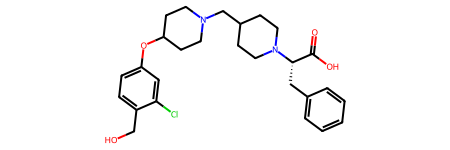

In [4]:
Chem.MolFromSmiles(smiles)

We can now build our visualization object using the ```VisualizeCounterfactual``` method. Here, we set ```delta = 0.5```, indicating that every compound with a predicted value that differs from the predicted value of the reference by more than 0.5 is a potential counterfactual.

In [5]:
vis = oce.VisualizeCounterfactual(smiles, model, delta=0.5)

100%|██████████| 6301/6301 [01:36<00:00, 65.44it/s]


Finally, we can plot the selected counterfactuals using the ```render_ipynb``` method.

In [6]:
vis.render_ipynb()

The x-axis is the Tanimoto similarity between each sampled molecule with the reference (base) molecule. The y-axis is the predicted value of the molecule from the trained model. For regression models such as this one, the y-axis will be continuous, whereas for classification models, it will be discrete. High and low counterfactuals can also be clearly seen as having either significantly higher or lower predicted outputs from the reference. For classification models, everything outside of the reference class would be simply labeled as a counterfactual. 

The number of points shown (default 40) can be varied by setting ```n=__```:

In [7]:
vis = oce.VisualizeCounterfactual(smiles, model, delta=0.5, n=10)

100%|██████████| 6301/6301 [01:34<00:00, 66.61it/s]


In [8]:
vis.render_ipynb()

Counterfactuals can also be plotted in their original PCA space by setting ```pca=True```:

In [9]:
vis = oce.VisualizeCounterfactual(smiles, model, delta=0.5, pca=True)

100%|██████████| 6301/6301 [02:03<00:00, 51.08it/s]


In [10]:
vis.render_ipynb()

In this space, molecules closer to each other have a greater similarity. Thus, different clusters of molecules correspond to different high-level modifications of the reference molecule. Subclusters correspond to more specific modifications within these groups.